### Test if average height of all coffee drinkers is greater than 70 inches

### Approach 1: Using confidence interval to make a decision (simulate a sampling distribution for a statistic by bootstrapping our sample data)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(42)

df = pd.read_csv('../input/coffee-dataset/coffee_dataset.csv')


* Null hypotheses = mean height of all coffee drinkers is "less than or equal to 70"
* Alternative hypothesis = mean height of all coffee drinkers is "greater than 70"

In [2]:
# Bootstrap a sample set of data and compute the sample mean again and again
# Build the sampling distribution and corresponding confidence interval to determine reasonable values for population mean with some level of confidence
sample_df = df.sample(150)
means = []

for _ in range(10000):
    bootsample = sample_df.sample(150, replace=True)
    boot_mean = bootsample.height.mean()
    means.append(boot_mean)

low, upper = np.percentile(means, 2.5), np.percentile(means, 97.5)

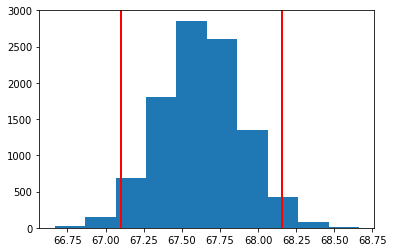

In [3]:
plt.hist(means)
plt.axvline(x=low, color='r', linewidth=2)
plt.axvline(x=upper, color='r', linewidth=2)

In [4]:
# Result: Look if the confidence interval falls in the null hypothesis space or in the alternative hypothesis space to choose which hypothesis we believe to be true
# Here our interval is entirely below 70. This suggests the null i.e population mean < 70, is actually true. So we accept null.

### Approach 2: Assume null is true. Then get the sampling distribution and standard deviation of the sampling distribution. From CLT, we know this is a normal distribution. Take the value that is still in null, but closest to alternative hypothesis as the hypothesized mean. Now see where the sample mean falls in the distribution compared to hypothesized mean. (simulate a sampling distribution from the null hypothesis using characteristics that would be true if our data were to have come from null)

### In our example, the hypothesized mean is 70

In [5]:
sample_df = df.sample(150)
means = []

for _ in range(10000):
    bootsample = sample_df.sample(150, replace=True)
    boot_mean = bootsample.height.mean()
    means.append(boot_mean)

In [6]:
# The standard deviation of the sampling distribution
np.std(means)

0.26604712064152153

(array([3.800e+01, 2.580e+02, 1.114e+03, 2.515e+03, 3.042e+03, 2.115e+03,
        7.620e+02, 1.390e+02, 1.600e+01, 1.000e+00]),
 array([69.07241396, 69.28584356, 69.49927316, 69.71270276, 69.92613236,
        70.13956196, 70.35299156, 70.56642115, 70.77985075, 70.99328035,
        71.20670995]),
 <BarContainer object of 10 artists>)

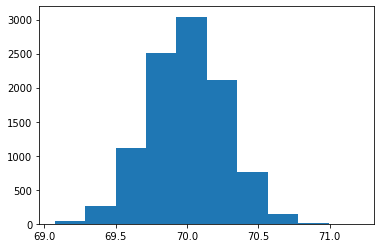

In [7]:
# Simulate draws from the normal using the hyothesized mean 70, and the standard deviation of the sampling distribution
null_vals = np.random.normal(70, np.std(means), 10000)
plt.hist(null_vals)

In [8]:
# Each of the simulated draws here represents a possible mean from the null hypothesis. 
# Now we can see where our sample mean falls in this distribution.
sample_df.height.mean()

67.5849917188006

In [9]:
# The sample mean is way below the lower tail end of the distribution from null. 
# However, since our null is that the population mean is less than or equal to 70, we do have evidence to support this claim with our sample mean of approximately 67. 
# This would suggest not rejecting our one-sided null alternative.

# If we had a null where we asked if the population mean was equal to 70, then we would be able to reject this null in favor of an alternative 
# that suggested the population mean was actually different from 70.

### Approach 3: using p value

* Calculate the value of the statistic you actually obtained in your data.
* Simulate the values of your statistic that are possible from the null.
* Compare your statistic to the values from the null.
* Calculate the proportion of null values that are considered extreme based on your alternative.

In [10]:
# Calculate the value of the statistic you actually obtained in your data
sample_df = df.sample(150)
sample_mean = sample_df.height.mean()

In [11]:
# Simulate the values of your statistic that are possible from the null (say alternative hypothesis is pop mean > 70)
# Then p value is proportion of simulated draws that are larger than sample mean
means = []

for _ in range(10000):
    bootsample = sample_df.sample(150, replace=True)
    boot_mean = bootsample.height.mean()
    means.append(boot_mean)

# Simulate draws from the normal using the hyothesized mean 70, and the standard deviation of the sampling distribution
null_vals = np.random.normal(70, np.std(means), 10000)

    
(null_vals > sample_mean).mean()

1.0

In [12]:
# Result: p value above is 1 so can't reject null of mean being <= 70